# IDS Assignment 2
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. 

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file in moodle.

# Preprocessing and Data Quality 


###Question 1 (Order cancellations)
Invoices with a InvoiceNo starting with the letter ‘c’ are order cancellations. Would you recommend keeping the order cancellation in your data set? Also provide a reason for your recommandation. 

Your answer:I will delete them, because the order cancled has nothing to do with the sales

In [1]:
import pandas as pd
import numpy
data = pd.read_excel('Online Retail.xlsx')


In [2]:
dataset1 = data[(data['Quantity']>0) & (data['UnitPrice'] > 0)]
dataset1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


###Question 2 (Empty values)
The attributes Description and CustomerID contain empty values. The Country attribute contains an “unspecified” value. For each of the three attributes reason how you would handle these values and why. 

Your answer: I will delete the records with empty CustomerID or with unspecified Country.

In [3]:
dataset2 = dataset1.dropna(subset=['CustomerID'])
dataset3 = dataset2[dataset2['Country']!= 'Unspecified']

###Question 3 (Outliers/Noise)
Explore into the attributes Quantity and UnitPrice by plotting each attribute visually. Do these attributes contain noise and/or outliers? If so, reason how you would handle them and modify your data set accordingly.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset3.describe()



,Quantity,UnitPrice,CustomerID
count,397640.000000,397640.000000,397640.000000
mean,12.991709,3.116436,15295.388630
std,179.386598,22.104501,1712.814193
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16800.000000
max,80995.000000,8142.750000,18287.000000


In [11]:
up_wisker1 = 12 + 1.5*(12 - 2)
low_wisker1 = 2 - 1.5*(12 - 2)
up_wisker2 = 3.75 + 1.5*(3.75 - 1.25)
low_wisker2 = 1.25 - 1.5*(3.75 - 1.25)

In [15]:
dataset4 = dataset3[(dataset3['Quantity'] < up_wisker1) & (dataset3['UnitPrice'] < up_wisker2)]
dataset4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom


Your explanation: I will remove all these noises

#Visualization

###Question 4 (Stream graph)
Create a stream graph that visualizes the number  of purchases (invoices) per country over time.

4. (a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland.

In [16]:
import numpy
data_Belgium = dataset4[dataset4['Country'] == 'Belgium']
data_EIRE = dataset4[dataset4['Country'] == 'EIRE' ]
data_France = dataset4[dataset4['Country'] == 'France' ]
data_Germany = dataset4[dataset4['Country'] == 'Germany' ]
data_Nlands = dataset4[dataset4['Country'] == 'Netherlands' ]
data_Norway = dataset4[dataset4['Country'] == 'Norway' ]
data_Port = dataset4[dataset4['Country'] == 'Portugal']
data_Spain = dataset4[dataset4['Country'] == 'Spain']
data_swiss = dataset4[dataset4['Country'] == 'Switzerland']


4. (b) Modify the data set such that it shows per month for each country how many purchases were made (i.e. how many invoices were created).

In [17]:

def mod_month(data):
    N = []
    for i in range(1,13):
        N.append(len(data[data['InvoiceDate'].dt.month == i]))
    return N

N_Belgium = mod_month(data_Belgium)
N_EIRE = mod_month(data_EIRE)
N_France = mod_month(data_France)
N_Germany = mod_month(data_Germany)
N_Nlands = mod_month(data_Nlands)
N_Norways = mod_month(data_Norway)
N_Port = mod_month(data_Port)
N_Spain = mod_month(data_Spain)
N_swiss = mod_month(data_swiss)


4. (c) Use the modified data to create a stream graph. 

<function matplotlib.pyplot.show>

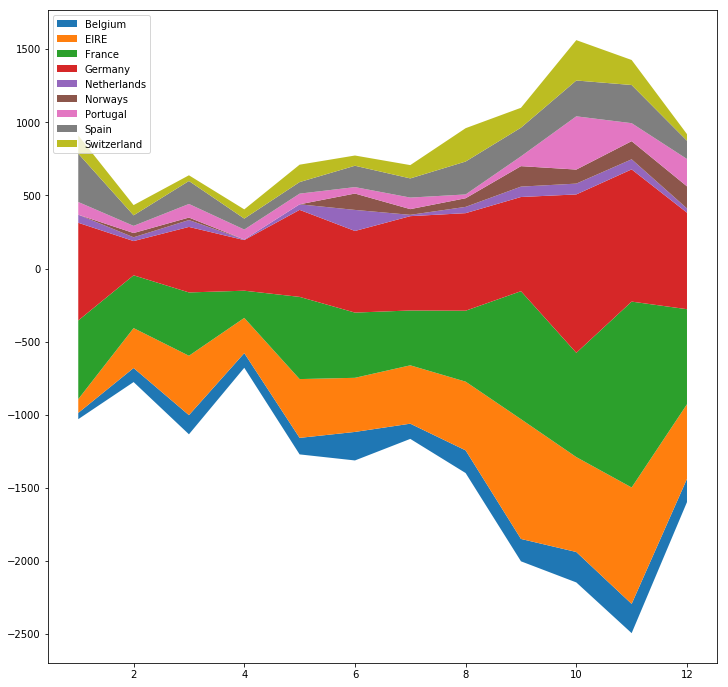

In [18]:
labels = ['Belgium', 'EIRE', 'France', 'Germany', 'Netherlands','Norways','Portugal', 'Spain','Switzerland']
y = numpy.vstack([N_Belgium,N_EIRE, N_France,N_Germany,N_Nlands,N_Norways,N_Port,N_Spain,N_swiss])
x = list(range(1,13))
fig,ax = plt.subplots(figsize = (12,12))

ax.stackplot(x,N_Belgium,N_EIRE, N_France,N_Germany,N_Nlands,N_Norways,N_Port,N_Spain,N_swiss, labels = labels, baseline = 'wiggle')
ax.legend(loc = 'upper left')
plt.show

4. (d) Use this graph to compare the purchases made by each country. 

Your answer:from the graph, we can see that people from three countries Germany,France,EIRE are buying the most of the goods among all the countries.

### Question 5 (Heat map)
Create a heat map that visualizes how much (in sterling) each country purchases per month. 

5. (a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland. (Or use the version of the data set that you created for question 4 a).

In [19]:
data_Belgium = dataset4[dataset4['Country'] == 'Belgium']
data_EIRE = dataset4[dataset4['Country'] == 'EIRE' ]
data_France = dataset4[dataset4['Country'] == 'France' ]
data_Germany = dataset4[dataset4['Country'] == 'Germany' ]
data_Nlands = dataset4[dataset4['Country'] == 'Netherlands' ]
data_Norway = dataset4[dataset4['Country'] == 'Norway' ]
data_Port = dataset4[dataset4['Country'] == 'Portugal']
data_Spain = dataset4[dataset4['Country'] == 'Spain']
data_swiss = dataset4[dataset4['Country'] == 'Switzerland']

5. (b) Modify the data set such that it shows per month how much money (in sterling) was spent in the shop per country.

In [20]:
def cal_money(data):
    Money=[]
    for i in range(1,13):
        df = data[data['InvoiceDate'].dt.month == i]
        Q = numpy.array(df['Quantity'])
        U = numpy.array(df['UnitPrice'])
        Money.append((Q*U).sum())
    return Money
        
M_Belgium = cal_money(data_Belgium)
M_EIRE = cal_money(data_EIRE)
M_France = cal_money(data_France)
M_Germany = cal_money(data_Germany)
M_Nlands = cal_money(data_Nlands)
M_Norway = cal_money(data_Norway)
M_Port = cal_money(data_Port)
M_Spain = cal_money(data_Spain)
M_swiss = cal_money(data_swiss)
money_array = numpy.array([M_Belgium,M_EIRE,M_France,M_Germany,M_Nlands,M_Norway,M_Port,M_Spain,M_swiss])
numpy.set_printoptions(suppress=True)
money_array


array([[  768.83,  1511.71,  2248.28,  1580.92,  1766.6 ,  3268.86,
         1697.02,  2419.47,  2711.02,  3746.06,  3811.05,  2264.29],
       [ 1887.8 ,  4546.71,  7782.43,  3816.64,  8011.26,  7776.52,
         7781.76,  8354.77, 16304.18, 12162.15, 16544.  , 10521.34],
       [10528.08,  6318.24,  7440.19,  2887.59, 10498.8 ,  8873.11,
         6765.34,  8328.81, 16351.13, 11064.85, 20761.86, 12061.98],
       [11221.93,  4892.44,  7955.99,  7021.36, 11780.46,  8974.67,
        11223.4 , 12235.78, 12081.19, 20564.49, 16822.51, 13113.35],
       [ 1851.46,   930.58,   847.2 ,   140.8 ,  1186.76,  2299.95,
           11.02,  1386.59,  2422.96,  1459.17,  1135.81,  1051.6 ],
       [    0.  ,   522.8 ,   311.01,     0.  ,     0.  ,  2637.92,
          643.94,   988.36,  4016.06,  2056.89,  3046.97,  3756.81],
       [ 2129.03,   890.7 ,  1862.1 ,  1378.75,   544.38,   738.56,
         1739.15,   499.9 ,  1138.16,  4204.95,  1734.1 ,  3603.09],
       [ 4864.2 ,  1236.79,  2746.39,  12

5. (c) Use the modified data to create a heat map. 

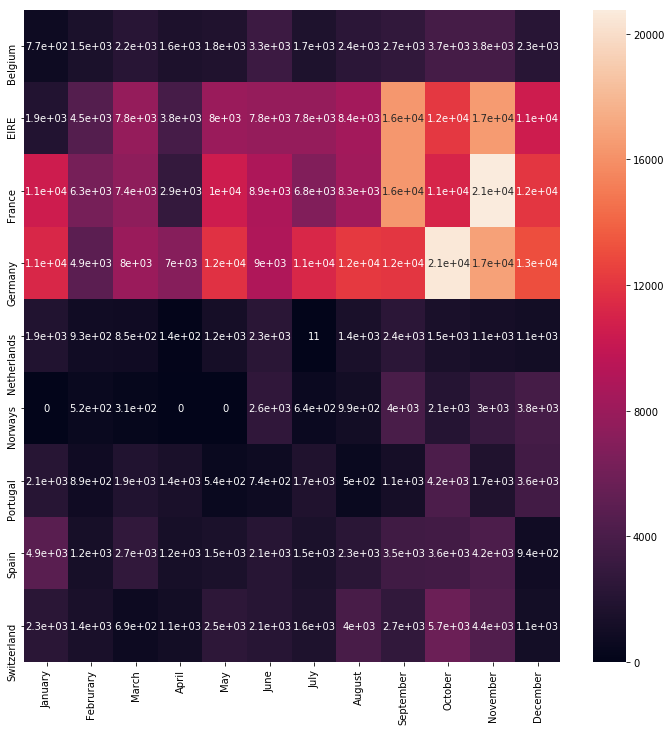

In [21]:
import seaborn as sns

fig,ax = plt.subplots(figsize= (12,12))
sns.heatmap(money_array, xticklabels=['January','Februrary','March','April','May','June','July','August','September','October','November','December'],
            yticklabels = ['Belgium', 'EIRE', 'France', 'Germany', 'Netherlands','Norways','Portugal', 'Spain','Switzerland'], annot=True)

5. (d) Compare the amount of the purchases over time and between each country. 

Your answer:we can see that in atumun people are buying most of the goods 

###Question 6 (Interpretation)
Compare the results obtained from the stream graph and the heat map. Is there a relation between the number of purchases and the amount purchased in sterling?


Your answer:a bigger number of purchases indicate a big amount purchased in sterling

# Clustering
Presume that the business analyst would like to cluster transactions with similar types of products into the same group (here don’t consider the quantity of the products). For each product, only use its ‘StockCode’ to represent it. All the results here should be based on the preprocessed data set obtained from question 1 to 3 of this assignment. Presume that this obtained data set from question 1 to 3 has a variable name ‘cluster_dataset’ and is expressed by Pandas DataFrame in your code.

###Question 7 (Data transformation and clustering)
7. (a) Calculate and show the number of occurrences of each product in data set   ‘cluster_dataset’. For example, if a product appears in a transaction, then its occurrence number will be increased by 1 (do not consider the quantity of this product here). Preserve the 100 most frequent products and remove all the other products in ‘cluster_dataset’. For example, if a row in ‘cluster_dataset’ contains unqualified product, then remove this row from ‘cluster_dataset’. Show the new ‘cluster_dataset’ in your result.


In [22]:
import numpy as np
dt_p = dataset4
stock_data = dt_p['StockCode'].value_counts() #get the frequencies of all the StockCode
Stock = list(stock_data[0:100].index.values)  #get the 100 most frequent items
Stock1 = [str(item) for item in Stock ]      #convert to string
cluster_dataset = dt_p.loc[dt_p['StockCode'].isin(Stock)]
cluster_dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
17,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
18,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-12-01 08:45:00,2.95,12583.0,France
35,536370,22629,SPACEBOY LUNCH BOX,24,2010-12-01 08:45:00,1.95,12583.0,France
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom


7. (b) Based on question a, please reorganize the data from ‘cluster_dataset’ and generate a new data set ‘cluster_dataset_new’ which has a suitable format (for k-means) for solving the transaction clustering problem mentioned above. Show the data from ‘cluster_dataset_new’ by using Pandas DataFrame in your result, where the index should be consistent with the values of 'InvoiceNo', the column name should be consistent with the values of 'StockCode' and each element in this DataFrame should have a value 0 or 1.

In [23]:
def newdata(data,Stock):                                # a function to get the new dataset
    data_invoice = data.drop_duplicates(subset='InvoiceNo') #delete the duplicated InvoiceNo
    invoice = list(data_invoice['InvoiceNo'])
    cluster_data_new = pd.DataFrame(data = 0, index=invoice,columns=Stock) #build a new empty dataset with index- InvoiceNo, colums-StockCode
    for item in invoice:
        dt_now =data[data['InvoiceNo'] == item]      #dataset with certain InvoiceNo
        s_list = list(dt_now['StockCode'])           #get the coressponding StockCode 
        s_list_str = [str(item) for item in s_list]
        cluster_data_new.loc[item][s_list_str] = 1
    return cluster_data_new


cluster_dataset_new = newdata(cluster_dataset,Stock1)
cluster_dataset_new



,85123A,85099B,47566,20725,84879,22720,20727,22383,23203,23298,...,20972,23322,84378,22835,22556,82483,22114,21915,22090,23307
536365,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
536375,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
536378,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


7. (c) Try values 2, 3, 4, 5 for parameter 'n_clusters' for the k-means function from Scikit-Learn over the data set ‘cluster_dataset_new’ generated in question b. Show the ‘within cluster variation’ (also called ‘sum of squared distances’) of the generated clusters for each different setting for ‘n_clusters’ in your result. Also write down the value that you have tried for setting 'n_clusters' which can help generate the best clustering results and explain how you make this decision.

In [33]:
from sklearn.cluster import KMeans
K_data = cluster_dataset_new.values

#cluster number = 1
cluster_num = 1
kmeans = KMeans(cluster_num).fit(K_data)
sum_distance1 = kmeans.inertia_
print(sum_distance1)

66581.99593074873


In [34]:

#cluster number = 2
cluster_num = 2
kmeans = KMeans(cluster_num).fit(K_data)
sum_distance2 = kmeans.inertia_
print(sum_distance2)

63231.260890988044


In [35]:
#cluster number = 3
cluster_num = 3
kmeans = KMeans(cluster_num).fit(K_data)
sum_distance3 = kmeans.inertia_
print(sum_distance3)

61841.777515870985


In [36]:
#cluster number = 4
cluster_num = 4
kmeans = KMeans(cluster_num).fit(K_data)
sum_distance4 = kmeans.inertia_
print(sum_distance3)

61841.777515870985


In [37]:
#cluster number = 5
cluster_num = 5
kmeans = KMeans(cluster_num).fit(K_data)
sum_distance5 = kmeans.inertia_
print(sum_distance5)

59770.8734337199


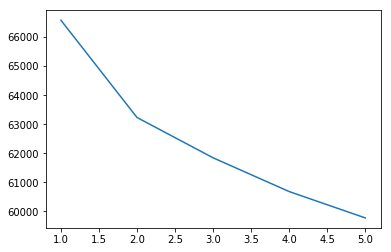

In [38]:
y = [sum_distance1,sum_distance2,sum_distance3,sum_distance4,sum_distance5]
x = [1,2,3,4,5]
plt.plot(x,y)

Your explanation: we can see that the change rate of the sum of squared distance changes when clusters number = 2, and it becomes smoother, so I choose 3 as cluster number

# Frequent Itemsets and Association Rules
 For the clusters output by k-means function with the best 'n_clusters' from question 7, the business analyst now would like to research on the frequent purchase behaviours and specific purchase rules for each cluster.
###Question 8 (Data transformation and mining frequent itemsets and association rules)
8. (a) Set the minimum support for finding the frequent purchase behaviours to 0.2. Please provide the business analyst with the qualified purchase behaviours. For each product, only use its ‘StockCode’ to represent it. Also show the data set prepared for each cluster for mining the frequent behaviours by using Pandas DataFrame in your result, the data set for the cluster k should have the variable name 'fpb_data_k' in your code.

In [50]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as rules


K_data = cluster_dataset_new[Stock1].values
#cluster number = 2
cluster_num = 2
kmeans = KMeans(cluster_num).fit(K_data)
sum_distance = kmeans.inertia_
index = kmeans.labels_

data_cluster = pd.DataFrame()
data_cluster['InvoiceNo'] = cluster_dataset_new.index
data_cluster['clusters'] = index


fbp_data_1 = data_cluster[data_cluster['clusters'] == 0]
fbp_data_2 = data_cluster[data_cluster['clusters'] == 1]



def getcluster(index,data,setnum):
    subset = np.array([data[i] for i in range(len(data)) if index[i] == setnum])
    return subset

subset1 = getcluster(index,K_data,0)
subset2 = getcluster(index,K_data,1)


# for subset1: mining frequent itemsets
rows1,colums1 = subset1.shape
ref1 = np.ones((rows1,colums1))
subset1_bool = subset1 == ref1
subset1_data = pd.DataFrame(data = subset1_bool, columns= Stock1)
frequent_itemset1 = apriori(subset1_data, min_support= 0.2 , use_colnames= True)
frequent_itemset1



,support,itemsets


In [44]:
# for subset2: mining frequent itemsets
rows2,colums2 = subset2.shape
ref2 = np.ones((rows2,colums2))
subset2_bool = subset2 == ref2
subset2_data = pd.DataFrame(subset2_bool, columns=Stock1)
frequent_itemset2 = apriori(subset2_data, min_support= 0.2, use_colnames= True)
frequent_itemset2

,support,itemsets
0,0.343137,(85099B)
1,0.526528,(20725)
2,0.441176,(20727)
3,0.461361,(22383)
4,0.290081,(23203)
5,0.424452,(22382)
6,0.370242,(23209)
7,0.419839,(20728)
8,0.411188,(22384)
9,0.358708,(23206)


8. (b) Furthermore, the business analyst would like to analyze the purchase behaviour of the citizens from ‘United Kingdom’ for each cluster. Specifically speaking, he wants to discover if there exist some rules which indicate that the citizens from ‘United Kingdom’ tend to buy some specific products for each cluster. Set the minimum support to 0.2, minimum confidence to 0.7. Please discover and show such rules (only show the rules with ‘United Kingdom’ appearing in antecedents in the rules) for each cluster for the business analyst. Also show the data sets prepared for each cluster for mining the relevant rules by using Pandas DataFrame in you result, the data set for cluster k should have the variable name 'r_data_k' in your code.

In [51]:
UK_data = cluster_dataset[cluster_dataset['Country'] == 'United Kingdom']

table = UK_data.pivot_table('Quantity',index = 'InvoiceNo', columns = 'StockCode')
table.fillna(0,inplace = True)
table[table>1] =1



# Process Mining
For this part, refer to the online docs of pm4py. You will find particularly of interest the documentation on filtering (https://pm4py.github.io/filtering.html, or on the new website http://pm4py.pads.rwth-aachen.de/documentation/filtering-logs/). 
important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade` from any terminal emulator on Windows  (command prompt, PowerShell, etc) or any terminal on *nix systems. For the details, refer to the study guide and the Process Mining instruction.
###Question 17 (Trace frequency)
17. (a) Use the provided event log and identify the least frequent traces and the most frequent traces.


In [52]:
import pm4py
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.algo.filtering.tracelog.variants import variants_filter
from pm4py.statistics.traces.tracelog import case_statistics

log = xes_importer.import_log('event_log.xes')
variants = variants_filter.get_variants(log)
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
print(variants_count)

[{'variant': 'Assigned Severity,Waiting,Under Processing,Solves,Closed', 'count': 12188}, {'variant': 'Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed', 'count': 10614}, {'variant': 'Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed', 'count': 2568}, {'variant': 'Assigned Severity,Under Processing,Waiting,Solves,Closed', 'count': 2251}]


the least frequent traces:  'Assigned Severity,Under Processing,Waiting,Solves,Closed'
the most frequent traces:  'Assigned S everity,Waiting,Under Processing,Solves,Closed'

###Question 18 (Process Discovery and Conformance Checking using first filtered event log)
18. (a) Remove the two least frequent traces and create a new event log out of the original event log without the two least frequent traces.

In [53]:
filtered_log1 = variants_filter.apply(log,['Assigned Severity,Under Processing,Waiting,Solves,Closed'],parameters = {'positive': False})
filtered_log2 = variants_filter.apply(filtered_log1,['Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed'],
                                                     parameters = {'positive': False})
variants_log2 = case_statistics.get_variant_statistics(filtered_log2)
print(variants_log2)

[{'variant': 'Assigned Severity,Waiting,Under Processing,Solves,Closed', 'count': 12188}, {'variant': 'Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed', 'count': 10614}]


18. (b) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without two least frequent traces).


In [54]:
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory

tree = inductive_miner.apply_tree(filtered_log2)
net, initial_marking, final_marking = inductive_miner.apply(filtered_log2)  #derive the Ptri-net model
gviz_tr = pt_vis_factory.apply(tree)
#pt_vis_factory.view(gviz_tr)

18. (c) Do the token replay conformance checking using your discovered model and the original event log. Does your process model fit?


In [55]:
from pm4py.algo.conformance.tokenreplay import factory as token_based_reply_factory


token_replay_result = token_based_reply_factory.apply(log, net, initial_marking, final_marking)
print(np.mean([item['trace_fitness']for item in token_replay_result]))

0.9422531165900341


Your explanation: my model fits quit well when people look at the mean value of fitness of each trace

18. (ci) Calculate the fitness of your model.

In [56]:
from pm4py.evaluation.replay_fitness import factory as replay_fitness_factory

fitness_tokenbasedreplay = replay_fitness_factory.apply(log,net, initial_marking, final_marking)
print(fitness_tokenbasedreplay)

{'perc_fit_traces': 82.55312986495782, 'average_trace_fitness': 0.9422531165900576, 'log_fitness': 0.9681466352032891}


18. (cii) Are there any deviations between the process model and the event log?

Your explanation:Yes, there are certainly mant deviations, because I deleted two least frequent traces

###Question 19 (Process Discovery and Conformance Checking using second filtered event log)
19. (a) Now use the original event log and remove the two most frequent traces, and discover the model based on your new event log(the filtered log without two most frequent traces).


In [57]:
filtered_log3 = variants_filter.apply(log,['Assigned Severity,Waiting,Under Processing,Solves,Closed'], parameters = {'positive':False})
filtered_log4 = variants_filter.apply(filtered_log3,['Assigned Severity,Waiting,Under Processing,Under Processing,Solves,Closed'],
                                      parameters={'positive' : False})

#dicover process tree model
tree = inductive_miner.apply_tree(filtered_log4)
#derive Petri_nets
net2, initial_marking2, final_marking2 = inductive_miner.apply(filtered_log4)

variants_log4 = case_statistics.get_variant_statistics(filtered_log4)
print(variants_log4)

[{'variant': 'Assigned Severity,Under Processing,Under Processing,Waiting,Solves,Closed', 'count': 2568}, {'variant': 'Assigned Severity,Under Processing,Waiting,Solves,Closed', 'count': 2251}]


19. (b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [58]:
token_replay_result2 = token_based_reply_factory.apply(log,net2, initial_marking2, final_marking2 )
print(np.mean([item['trace_fitness']for item in token_replay_result2]))

0.7237302535510423


Your explanation:fit not so well

19. (bi) Calculate the fitness of your model?

In [59]:
fitness_tokenbasedreplay2 = replay_fitness_factory.apply(log,net, initial_marking, final_marking)
print(fitness_tokenbasedreplay2)

{'perc_fit_traces': 82.55312986495782, 'average_trace_fitness': 0.9422531165900576, 'log_fitness': 0.9681466352032891}


19. (bii)  Is there any deviation inside the process model?

Your explanation:Yes, there is deviation inside the process model,since I removed the two most frequent traces, the fitness score of the discovered model is lower than the first one.

###Question 20 (Process Discovery using complete log)
20. (a) Use the complete event log (original event log) and discover your process model using inductive miner.


In [60]:
tree = inductive_miner.apply_tree(log)
net3,initial_marking3,final_marking3 = inductive_miner.apply(log)


20. (b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [61]:
token_replay_result3 = token_based_reply_factory.apply(log,net3, initial_marking3, final_marking3 )
print(np.mean([item['trace_fitness']for item in token_replay_result3]))

1.0


Your explanation: the model is built upon all the traces, so the model can best fit the log file.

20. (c) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Your explanation:the model based on the whole log file fits the best, because it contains all the possible situations.